# SAE Training Example

## Adding src to sys.path for imports

In [19]:
!git pull

fatal: unable to access 'https://github.com/ranaabarghout/AstroBio.git/': Could not resolve host: github.com


In [ ]:
import sys
import os
os.chdir("AstroBio")
#ys.path.append("./src")



## Imports

In [12]:
import torch
import scanpy as sc
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
from torch.optim import Adam

# local
from src.models import SparseAutoencoder
from src.dataset import EmbeddingDataset


## Load scanpy object

In [13]:
adata = sc.read_h5ad("./data/external/adata_sample.h5ad")
embeddings_data = adata.obsm["geneformer"]

## Create Datasets

In [14]:
dset = EmbeddingDataset(embeddings_data)
train_dataset, test_dataset = random_split(dset, [0.8, 0.2])

In [15]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## Training the Model

Training: 100%|██████████| 100/100 [00:24<00:00,  4.03it/s, Train Loss=0.0041, Test Loss=0.0144, Train Recon=0.0040, Test Recon=0.0143]


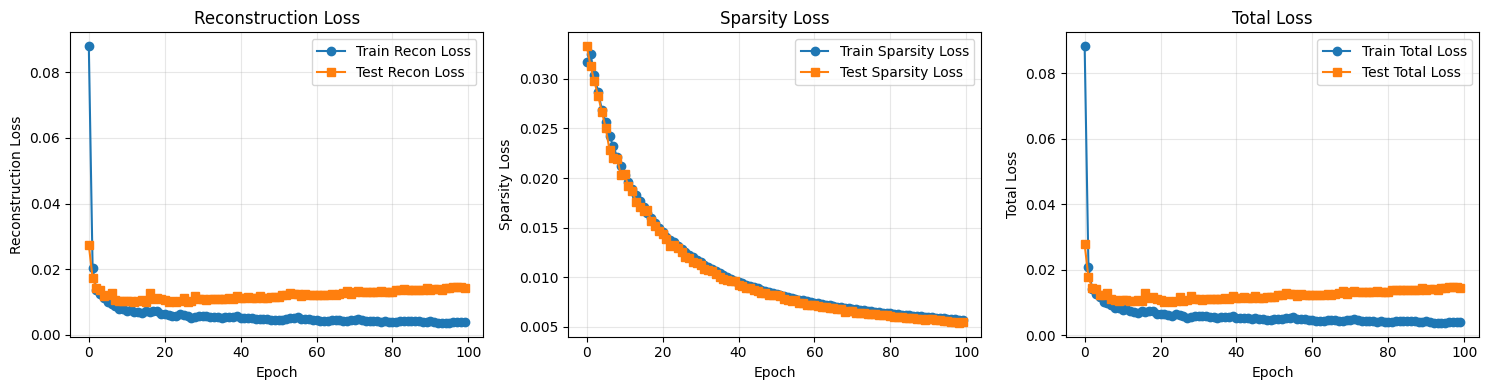

In [17]:
model = SparseAutoencoder(input_dim=512,hidden_dim=1028, expanded_ratio=10)
losses = model.train_model(
    train_loader=train_loader,
    test_loader=test_loader,
    n_epochs=100,
    lr=1e-3,
    sparsity_weight=1e-2,
)

[I 2025-11-05 15:21:40,908] A new study created in memory with name: no-name-d364a7f4-a221-4aee-ab93-82dc0ef7f029
/tmp/ipykernel_34547/3504640075.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-4, 5e-3)
/tmp/ipykernel_34547/3504640075.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  sparsity_weight = trial.suggest_loguniform('sparsity_weight', 1e-4, 1e-1)


test for the following hyperparam: hidden_dim-256, expanded_ratio-2.5,n_encoder_layers-1,n_decoder_layers-3,sparsity_weight-0.013311216080736894, lr-0.0010502105436744284 


Training: 100%|██████████| 50/50 [00:09<00:00,  5.18it/s, Train Loss=0.0097, Test Loss=0.0117, Train Recon=0.0085, Test Recon=0.0105]


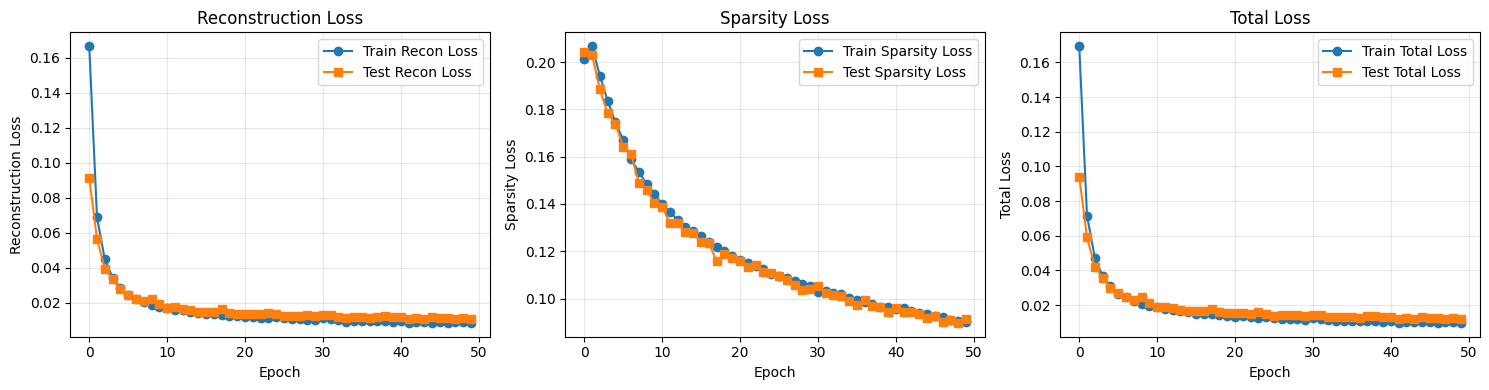

[I 2025-11-05 15:21:51,206] Trial 0 finished with value: 0.011735944455722347 and parameters: {'hidden_dim': 256, 'expanded_ratio': 2.5, 'n_encoder_layers': 1, 'n_decoder_layers': 3, 'lr': 0.0010502105436744284, 'sparsity_weight': 0.013311216080736894}. Best is trial 0 with value: 0.011735944455722347.


test for the following hyperparam: hidden_dim-256, expanded_ratio-3.0,n_encoder_layers-1,n_decoder_layers-2,sparsity_weight-0.0007476312062252305, lr-0.0005418282319533242 


Training: 100%|██████████| 50/50 [00:09<00:00,  5.53it/s, Train Loss=0.0052, Test Loss=0.0059, Train Recon=0.0049, Test Recon=0.0056]


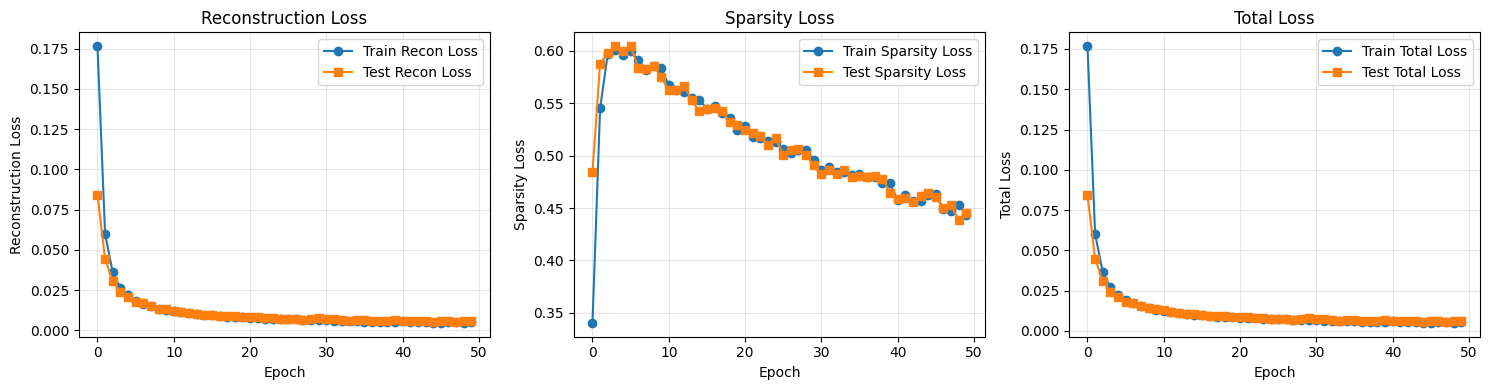

[I 2025-11-05 15:22:00,700] Trial 1 finished with value: 0.005943731346633285 and parameters: {'hidden_dim': 256, 'expanded_ratio': 3.0, 'n_encoder_layers': 1, 'n_decoder_layers': 2, 'lr': 0.0005418282319533242, 'sparsity_weight': 0.0007476312062252305}. Best is trial 1 with value: 0.005943731346633285.


test for the following hyperparam: hidden_dim-128, expanded_ratio-8.5,n_encoder_layers-1,n_decoder_layers-2,sparsity_weight-0.000137832374550072, lr-0.0010150667045928574 


Training: 100%|██████████| 50/50 [00:08<00:00,  5.62it/s, Train Loss=0.0079, Test Loss=0.0081, Train Recon=0.0079, Test Recon=0.0081]


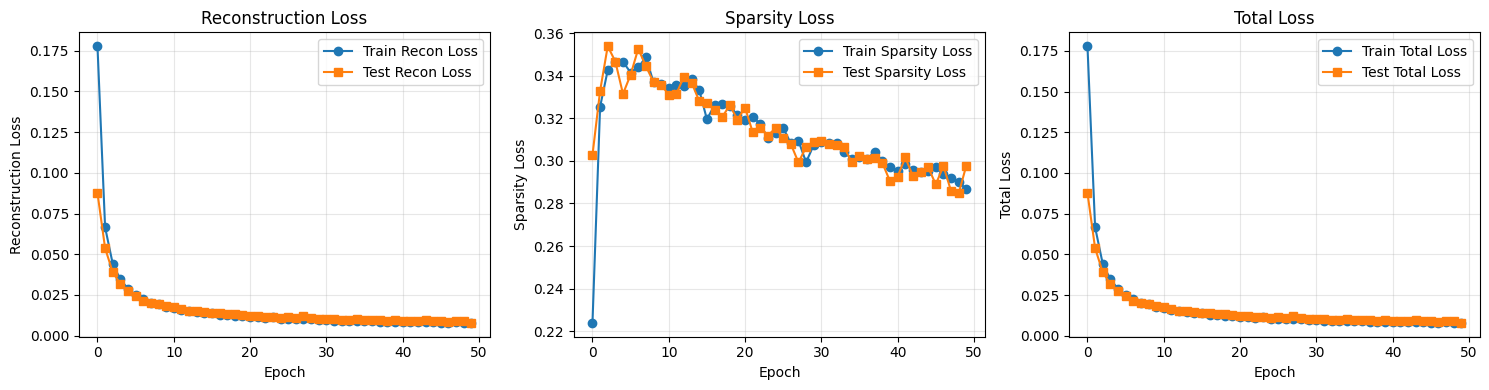

[I 2025-11-05 15:22:10,022] Trial 2 finished with value: 0.008129770591040142 and parameters: {'hidden_dim': 128, 'expanded_ratio': 8.5, 'n_encoder_layers': 1, 'n_decoder_layers': 2, 'lr': 0.0010150667045928574, 'sparsity_weight': 0.000137832374550072}. Best is trial 1 with value: 0.005943731346633285.


test for the following hyperparam: hidden_dim-2048, expanded_ratio-8.5,n_encoder_layers-1,n_decoder_layers-1,sparsity_weight-0.0020914981329035616, lr-0.0014537555576161927 


Training: 100%|██████████| 50/50 [00:24<00:00,  2.04it/s, Train Loss=0.0068, Test Loss=0.0154, Train Recon=0.0068, Test Recon=0.0154]


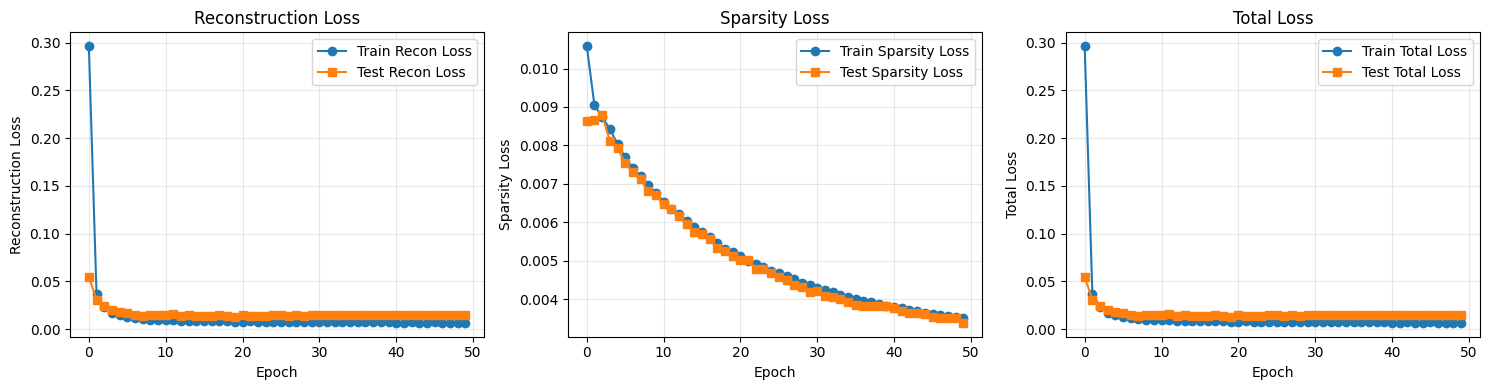

[I 2025-11-05 15:22:35,253] Trial 3 finished with value: 0.015373152389656752 and parameters: {'hidden_dim': 2048, 'expanded_ratio': 8.5, 'n_encoder_layers': 1, 'n_decoder_layers': 1, 'lr': 0.0014537555576161927, 'sparsity_weight': 0.0020914981329035616}. Best is trial 1 with value: 0.005943731346633285.


test for the following hyperparam: hidden_dim-1028, expanded_ratio-7.0,n_encoder_layers-1,n_decoder_layers-2,sparsity_weight-0.00035856126103454, lr-0.0008488762161408717 


Training: 100%|██████████| 50/50 [00:13<00:00,  3.76it/s, Train Loss=0.0058, Test Loss=0.0118, Train Recon=0.0058, Test Recon=0.0118]


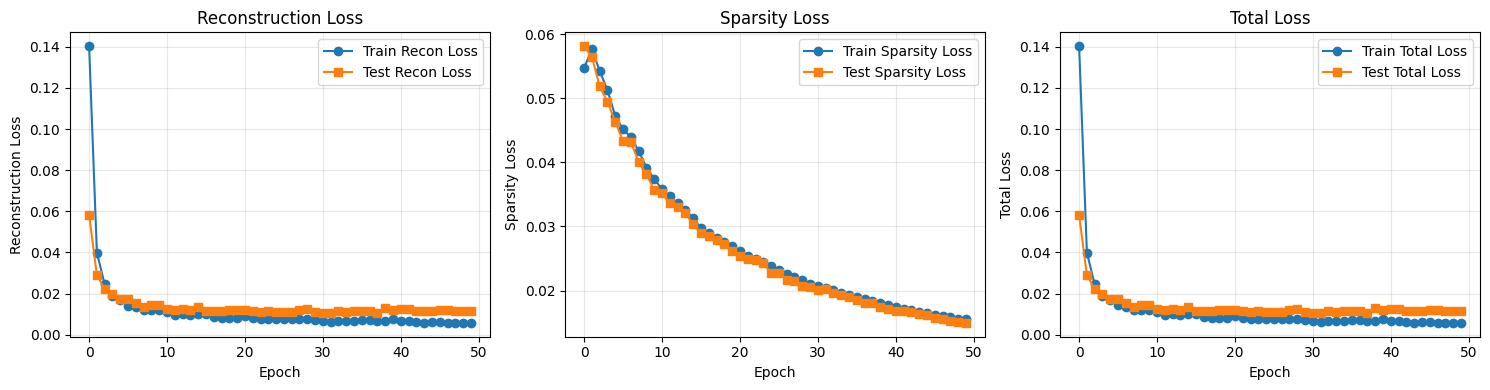

[I 2025-11-05 15:22:49,074] Trial 4 finished with value: 0.011786314571509138 and parameters: {'hidden_dim': 1028, 'expanded_ratio': 7.0, 'n_encoder_layers': 1, 'n_decoder_layers': 2, 'lr': 0.0008488762161408717, 'sparsity_weight': 0.00035856126103454}. Best is trial 1 with value: 0.005943731346633285.


test for the following hyperparam: hidden_dim-128, expanded_ratio-9.5,n_encoder_layers-1,n_decoder_layers-1,sparsity_weight-0.0009462175356461491, lr-0.00011935477742481393 


Training: 100%|██████████| 50/50 [00:07<00:00,  6.48it/s, Train Loss=0.0039, Test Loss=0.0044, Train Recon=0.0035, Test Recon=0.0040]


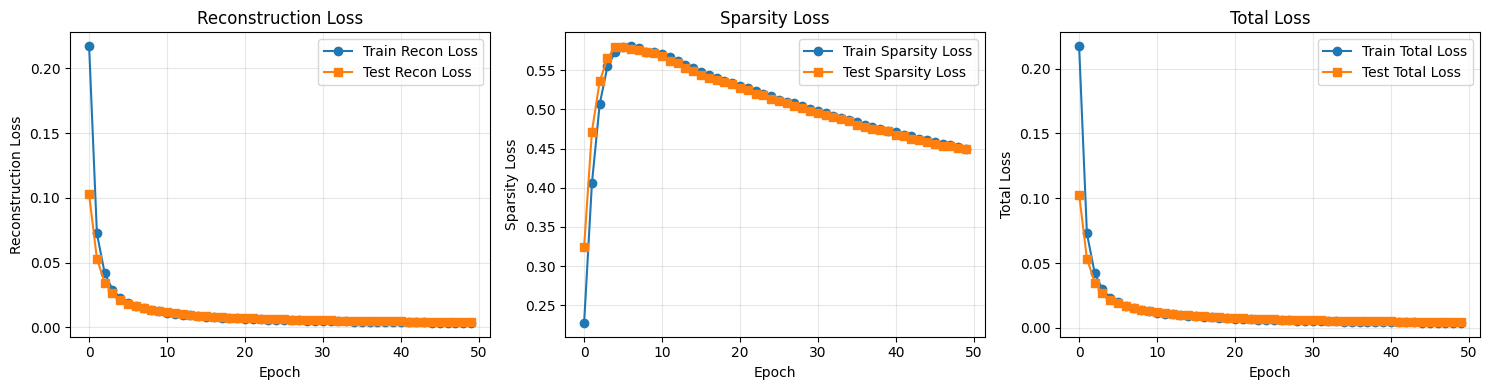

[I 2025-11-05 15:22:57,199] Trial 5 finished with value: 0.0044463327212724835 and parameters: {'hidden_dim': 128, 'expanded_ratio': 9.5, 'n_encoder_layers': 1, 'n_decoder_layers': 1, 'lr': 0.00011935477742481393, 'sparsity_weight': 0.0009462175356461491}. Best is trial 5 with value: 0.0044463327212724835.


test for the following hyperparam: hidden_dim-512, expanded_ratio-6.0,n_encoder_layers-1,n_decoder_layers-3,sparsity_weight-0.09133995846860977, lr-0.00013386261584543918 


Training: 100%|██████████| 50/50 [00:09<00:00,  5.00it/s, Train Loss=0.0064, Test Loss=0.0094, Train Recon=0.0045, Test Recon=0.0075]


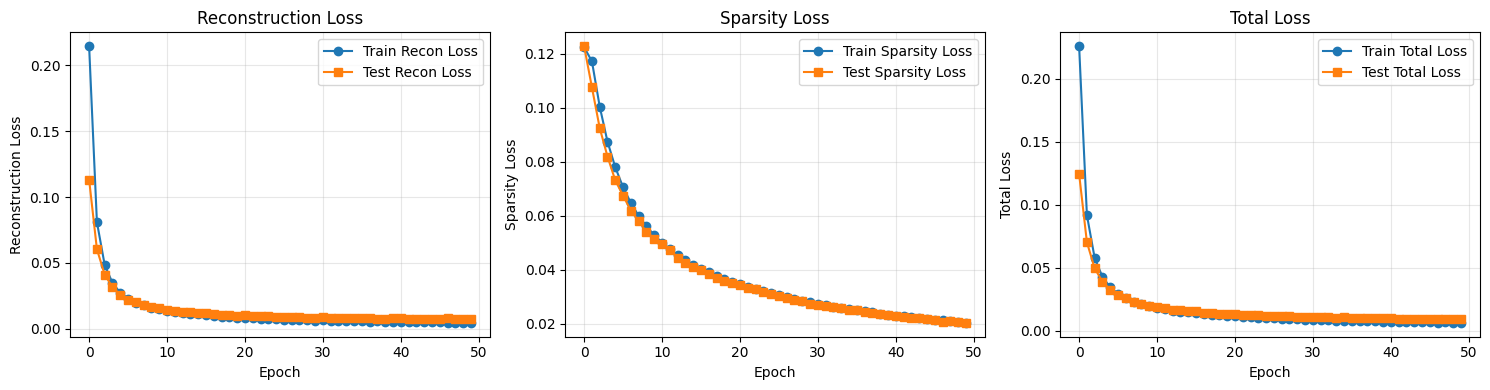

[I 2025-11-05 15:23:07,628] Trial 6 finished with value: 0.009369058621814474 and parameters: {'hidden_dim': 512, 'expanded_ratio': 6.0, 'n_encoder_layers': 1, 'n_decoder_layers': 3, 'lr': 0.00013386261584543918, 'sparsity_weight': 0.09133995846860977}. Best is trial 5 with value: 0.0044463327212724835.


test for the following hyperparam: hidden_dim-1028, expanded_ratio-8.0,n_encoder_layers-3,n_decoder_layers-1,sparsity_weight-0.00022264204303769702, lr-0.0004064644058668378 


Training: 100%|██████████| 50/50 [00:13<00:00,  3.59it/s, Train Loss=0.0047, Test Loss=0.0120, Train Recon=0.0047, Test Recon=0.0120]


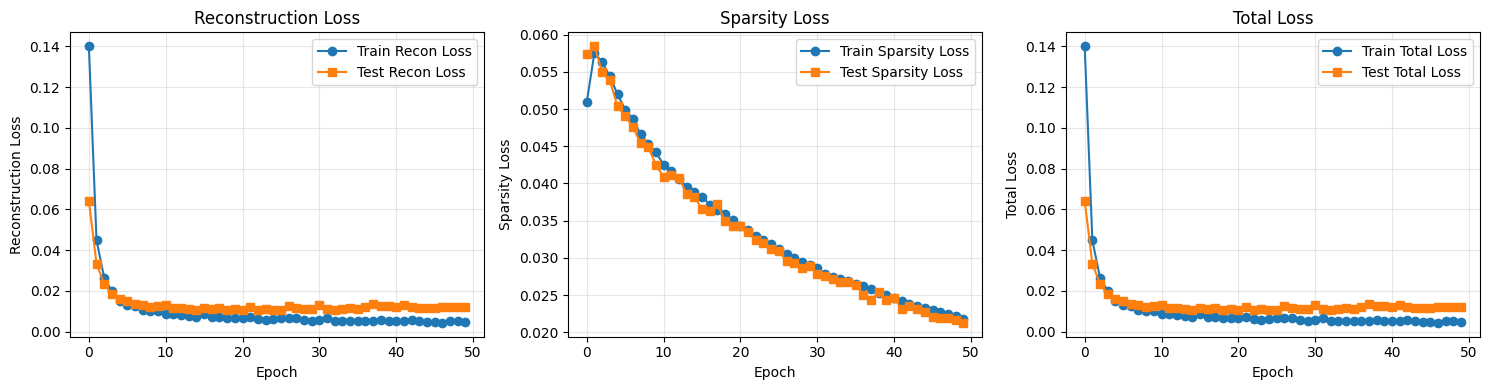

[I 2025-11-05 15:23:22,101] Trial 7 finished with value: 0.012034743704134598 and parameters: {'hidden_dim': 1028, 'expanded_ratio': 8.0, 'n_encoder_layers': 3, 'n_decoder_layers': 1, 'lr': 0.0004064644058668378, 'sparsity_weight': 0.00022264204303769702}. Best is trial 5 with value: 0.0044463327212724835.


test for the following hyperparam: hidden_dim-128, expanded_ratio-4.0,n_encoder_layers-3,n_decoder_layers-2,sparsity_weight-0.0026100256506134765, lr-0.00321623546920742 


Training: 100%|██████████| 50/50 [00:10<00:00,  4.86it/s, Train Loss=0.0247, Test Loss=0.0309, Train Recon=0.0246, Test Recon=0.0308]


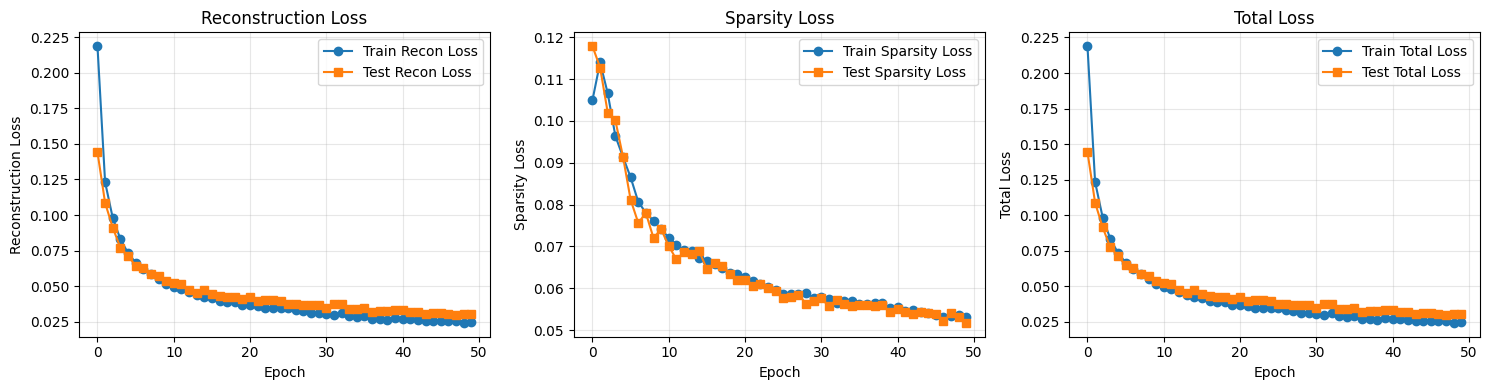

[I 2025-11-05 15:23:32,840] Trial 8 finished with value: 0.030940020573325455 and parameters: {'hidden_dim': 128, 'expanded_ratio': 4.0, 'n_encoder_layers': 3, 'n_decoder_layers': 2, 'lr': 0.00321623546920742, 'sparsity_weight': 0.0026100256506134765}. Best is trial 5 with value: 0.0044463327212724835.


test for the following hyperparam: hidden_dim-2048, expanded_ratio-5.5,n_encoder_layers-2,n_decoder_layers-2,sparsity_weight-0.00021070472806578247, lr-0.00011045524260304731 


Training: 100%|██████████| 50/50 [00:27<00:00,  1.81it/s, Train Loss=0.0018, Test Loss=0.0039, Train Recon=0.0018, Test Recon=0.0039]


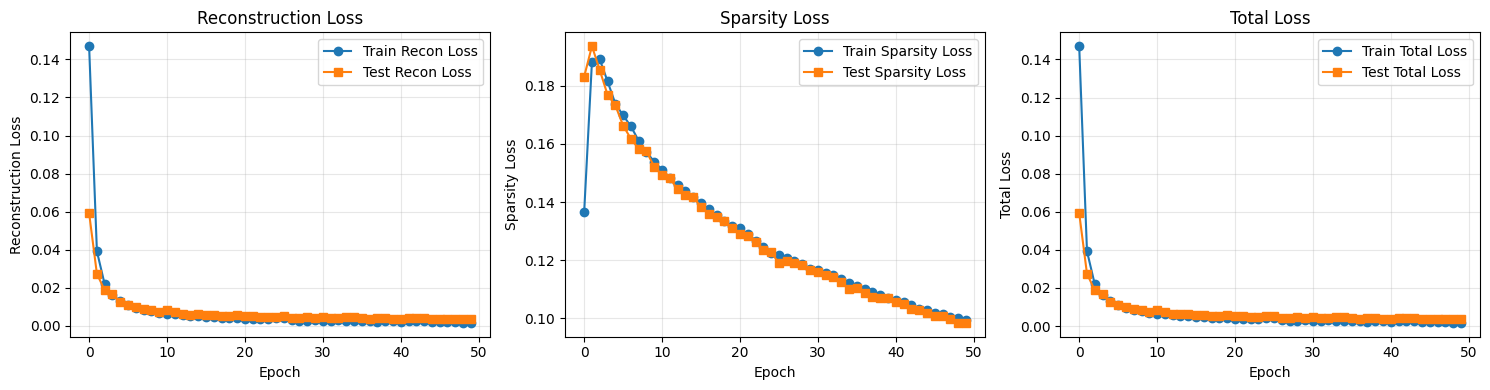

[I 2025-11-05 15:24:01,237] Trial 9 finished with value: 0.003909530030796304 and parameters: {'hidden_dim': 2048, 'expanded_ratio': 5.5, 'n_encoder_layers': 2, 'n_decoder_layers': 2, 'lr': 0.00011045524260304731, 'sparsity_weight': 0.00021070472806578247}. Best is trial 9 with value: 0.003909530030796304.


test for the following hyperparam: hidden_dim-2048, expanded_ratio-4.5,n_encoder_layers-2,n_decoder_layers-3,sparsity_weight-0.011769044926591624, lr-0.00029059412172736303 


Training: 100%|██████████| 50/50 [00:26<00:00,  1.88it/s, Train Loss=0.0056, Test Loss=0.0105, Train Recon=0.0055, Test Recon=0.0104]


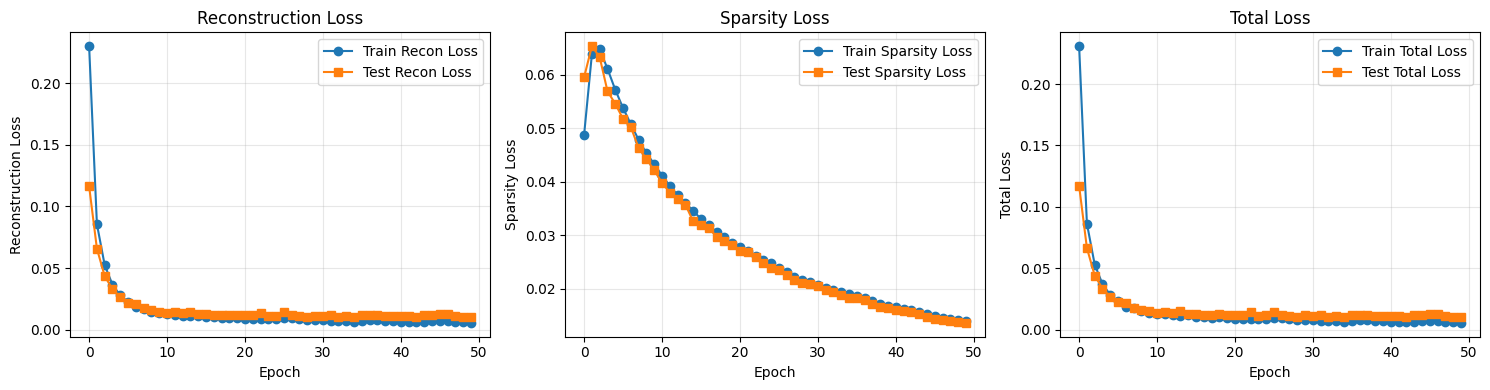

[I 2025-11-05 15:24:28,593] Trial 10 finished with value: 0.010514532012166455 and parameters: {'hidden_dim': 2048, 'expanded_ratio': 4.5, 'n_encoder_layers': 2, 'n_decoder_layers': 3, 'lr': 0.00029059412172736303, 'sparsity_weight': 0.011769044926591624}. Best is trial 9 with value: 0.003909530030796304.


test for the following hyperparam: hidden_dim-128, expanded_ratio-10.0,n_encoder_layers-2,n_decoder_layers-1,sparsity_weight-0.0007602116209516303, lr-0.00010356799582018741 


Training: 100%|██████████| 50/50 [00:08<00:00,  5.74it/s, Train Loss=0.0061, Test Loss=0.0068, Train Recon=0.0058, Test Recon=0.0065]


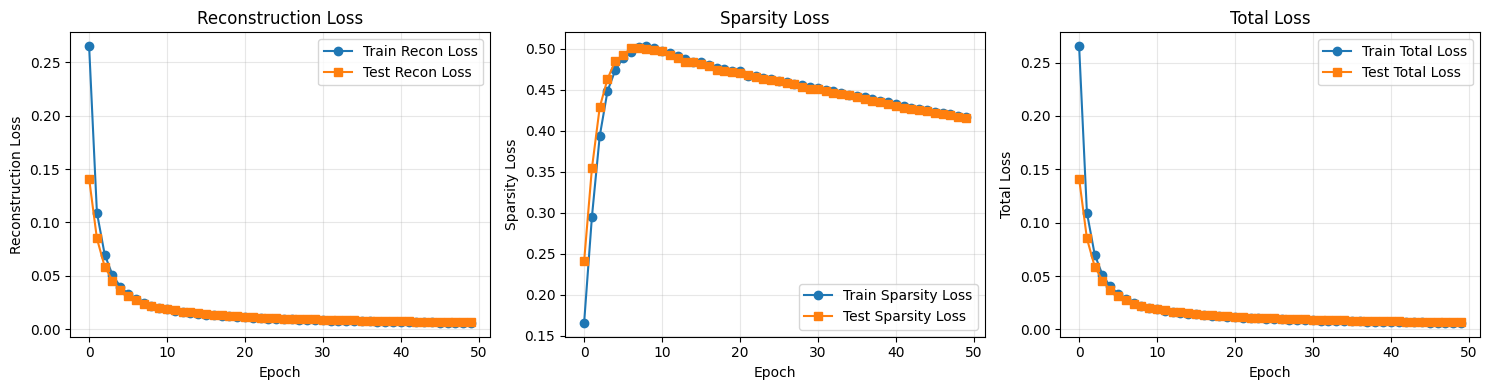

[I 2025-11-05 15:24:37,746] Trial 11 finished with value: 0.006801871029892936 and parameters: {'hidden_dim': 128, 'expanded_ratio': 10.0, 'n_encoder_layers': 2, 'n_decoder_layers': 1, 'lr': 0.00010356799582018741, 'sparsity_weight': 0.0007602116209516303}. Best is trial 9 with value: 0.003909530030796304.


test for the following hyperparam: hidden_dim-2048, expanded_ratio-5.5,n_encoder_layers-2,n_decoder_layers-1,sparsity_weight-0.00010421387293935661, lr-0.0002071689820465978 


Training: 100%|██████████| 50/50 [00:19<00:00,  2.53it/s, Train Loss=0.0024, Test Loss=0.0057, Train Recon=0.0024, Test Recon=0.0057]


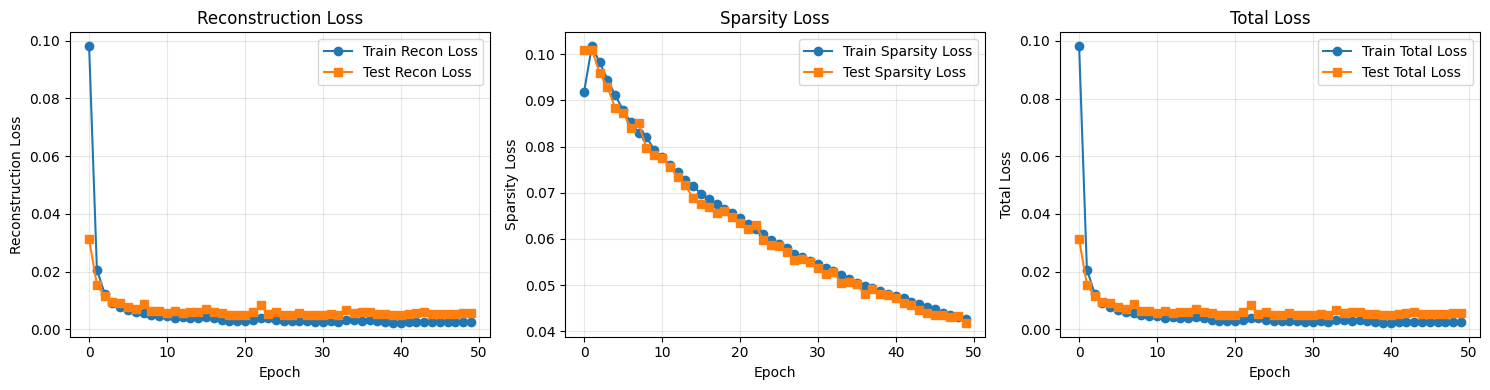

[I 2025-11-05 15:24:58,162] Trial 12 finished with value: 0.005666500801453367 and parameters: {'hidden_dim': 2048, 'expanded_ratio': 5.5, 'n_encoder_layers': 2, 'n_decoder_layers': 1, 'lr': 0.0002071689820465978, 'sparsity_weight': 0.00010421387293935661}. Best is trial 9 with value: 0.003909530030796304.


test for the following hyperparam: hidden_dim-512, expanded_ratio-10.0,n_encoder_layers-2,n_decoder_layers-1,sparsity_weight-0.0006659703893931954, lr-0.00017701853566940679 


Training: 100%|██████████| 50/50 [00:09<00:00,  5.09it/s, Train Loss=0.0015, Test Loss=0.0027, Train Recon=0.0014, Test Recon=0.0027]


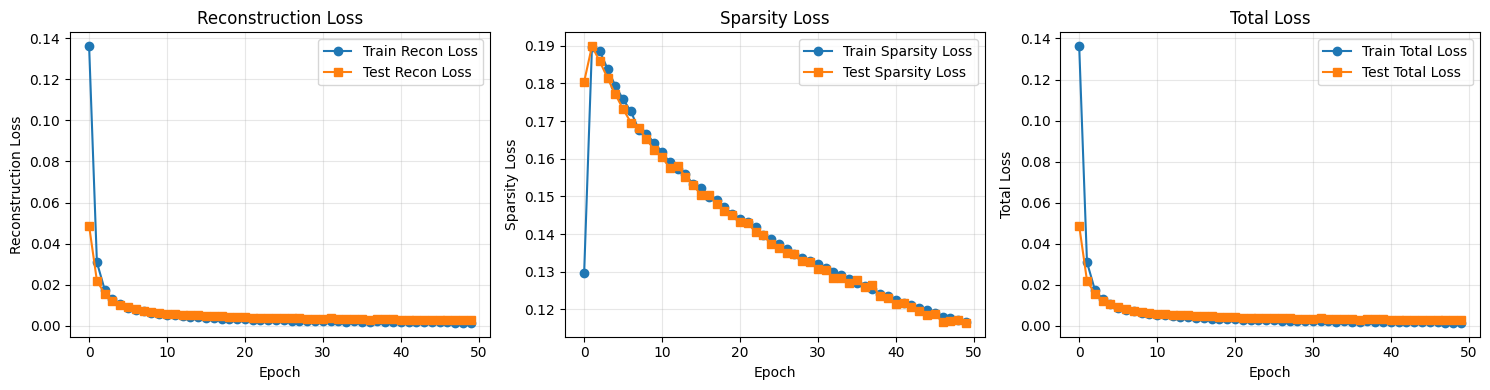

[I 2025-11-05 15:25:08,451] Trial 13 finished with value: 0.002743865828961134 and parameters: {'hidden_dim': 512, 'expanded_ratio': 10.0, 'n_encoder_layers': 2, 'n_decoder_layers': 1, 'lr': 0.00017701853566940679, 'sparsity_weight': 0.0006659703893931954}. Best is trial 13 with value: 0.002743865828961134.


test for the following hyperparam: hidden_dim-512, expanded_ratio-1.5,n_encoder_layers-2,n_decoder_layers-2,sparsity_weight-0.00044688317159837795, lr-0.00020826309379237115 


Training: 100%|██████████| 50/50 [00:09<00:00,  5.05it/s, Train Loss=0.0057, Test Loss=0.0063, Train Recon=0.0054, Test Recon=0.0060]


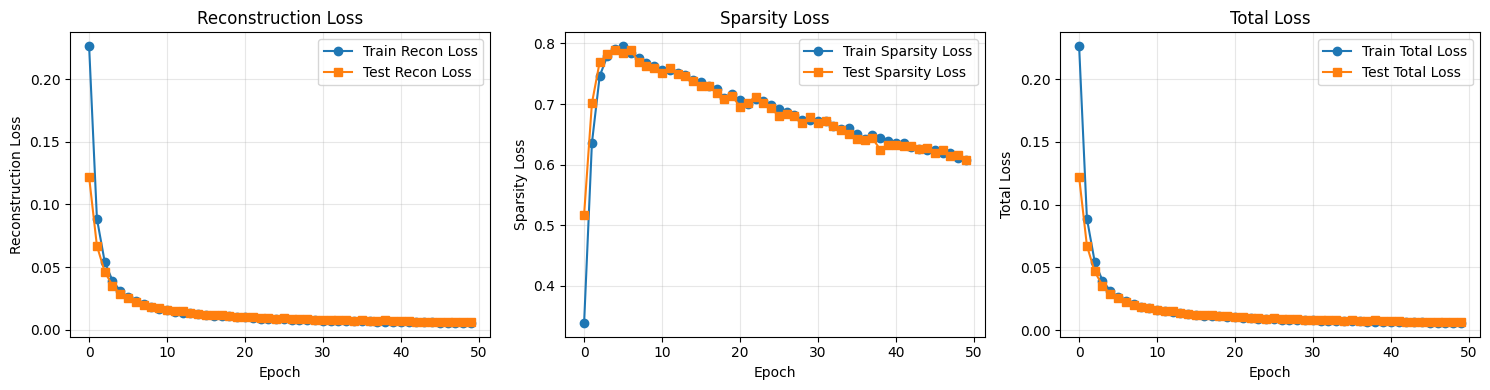

[I 2025-11-05 15:25:18,779] Trial 14 finished with value: 0.006316229730146006 and parameters: {'hidden_dim': 512, 'expanded_ratio': 1.5, 'n_encoder_layers': 2, 'n_decoder_layers': 2, 'lr': 0.00020826309379237115, 'sparsity_weight': 0.00044688317159837795}. Best is trial 13 with value: 0.002743865828961134.


test for the following hyperparam: hidden_dim-512, expanded_ratio-6.5,n_encoder_layers-2,n_decoder_layers-2,sparsity_weight-0.008590551698794436, lr-0.00020610739003017672 


Training: 100%|██████████| 50/50 [00:10<00:00,  4.80it/s, Train Loss=0.0048, Test Loss=0.0065, Train Recon=0.0040, Test Recon=0.0057]


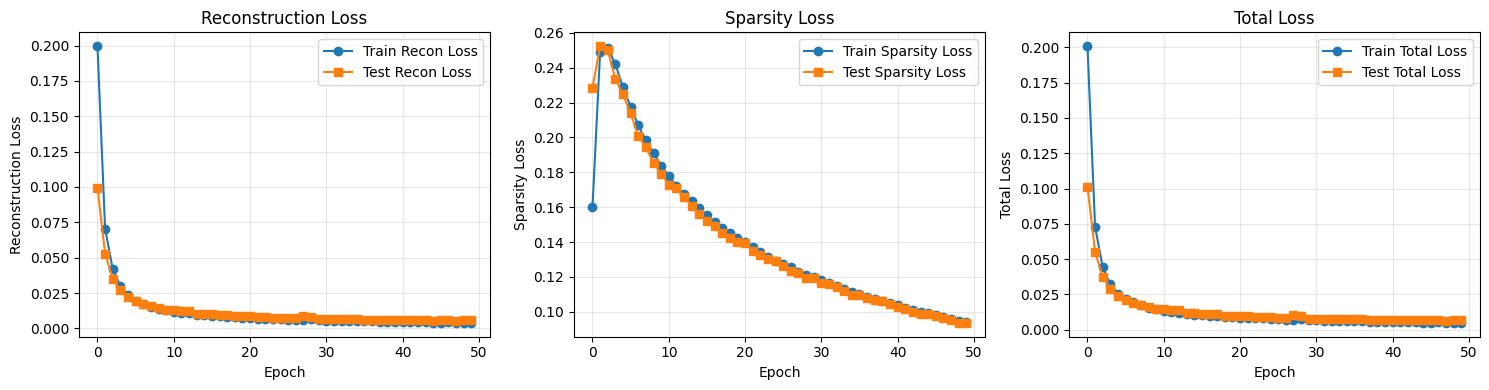

[I 2025-11-05 15:25:29,669] Trial 15 finished with value: 0.006529961712658405 and parameters: {'hidden_dim': 512, 'expanded_ratio': 6.5, 'n_encoder_layers': 2, 'n_decoder_layers': 2, 'lr': 0.00020610739003017672, 'sparsity_weight': 0.008590551698794436}. Best is trial 13 with value: 0.002743865828961134.


test for the following hyperparam: hidden_dim-512, expanded_ratio-5.0,n_encoder_layers-3,n_decoder_layers-1,sparsity_weight-0.0013715294253000936, lr-0.0003698511585803725 


Training: 100%|██████████| 50/50 [00:10<00:00,  4.92it/s, Train Loss=0.0034, Test Loss=0.0066, Train Recon=0.0033, Test Recon=0.0065]


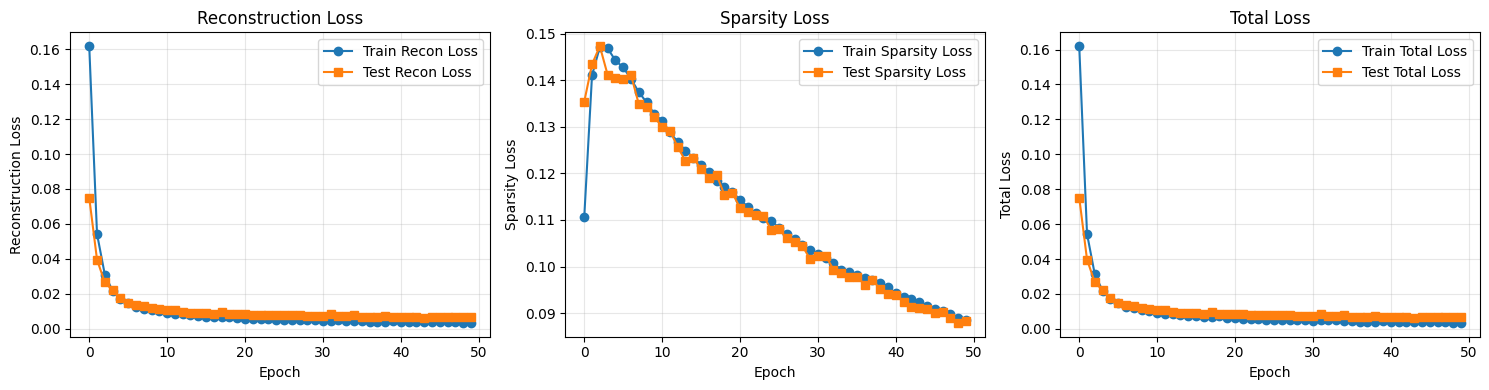

[I 2025-11-05 15:25:40,314] Trial 16 finished with value: 0.006602007109904662 and parameters: {'hidden_dim': 512, 'expanded_ratio': 5.0, 'n_encoder_layers': 3, 'n_decoder_layers': 1, 'lr': 0.0003698511585803725, 'sparsity_weight': 0.0013715294253000936}. Best is trial 13 with value: 0.002743865828961134.


test for the following hyperparam: hidden_dim-2048, expanded_ratio-7.5,n_encoder_layers-2,n_decoder_layers-3,sparsity_weight-0.00027662829820544326, lr-0.002169987133085646 


Training: 100%|██████████| 50/50 [00:36<00:00,  1.37it/s, Train Loss=0.0919, Test Loss=0.0950, Train Recon=0.0919, Test Recon=0.0950] 


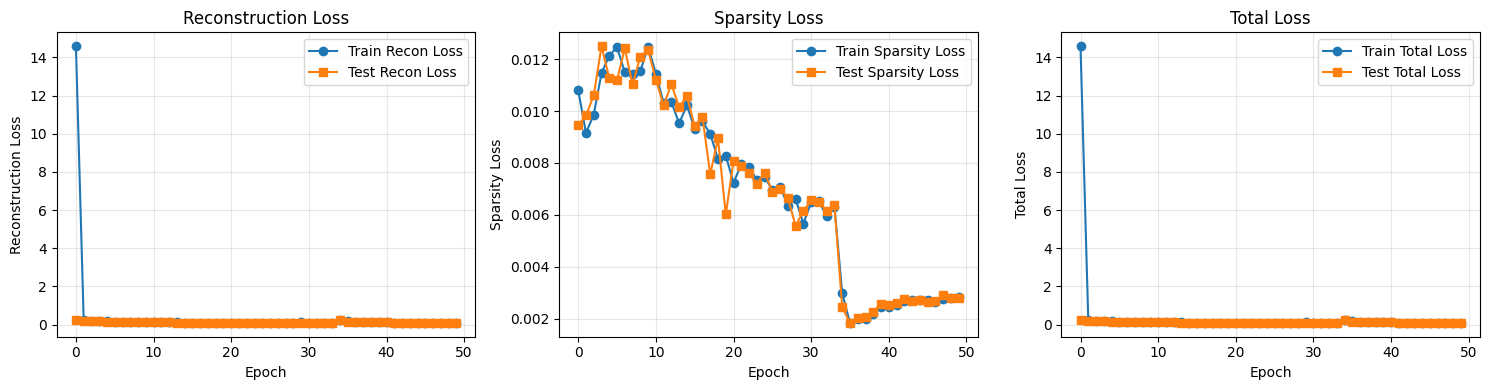

[I 2025-11-05 15:26:17,635] Trial 17 finished with value: 0.09502810169942677 and parameters: {'hidden_dim': 2048, 'expanded_ratio': 7.5, 'n_encoder_layers': 2, 'n_decoder_layers': 3, 'lr': 0.002169987133085646, 'sparsity_weight': 0.00027662829820544326}. Best is trial 13 with value: 0.002743865828961134.


test for the following hyperparam: hidden_dim-512, expanded_ratio-9.5,n_encoder_layers-3,n_decoder_layers-1,sparsity_weight-0.005591555587645788, lr-0.00016366925829173383 


Training: 100%|██████████| 50/50 [00:10<00:00,  4.61it/s, Train Loss=0.0027, Test Loss=0.0047, Train Recon=0.0023, Test Recon=0.0043]


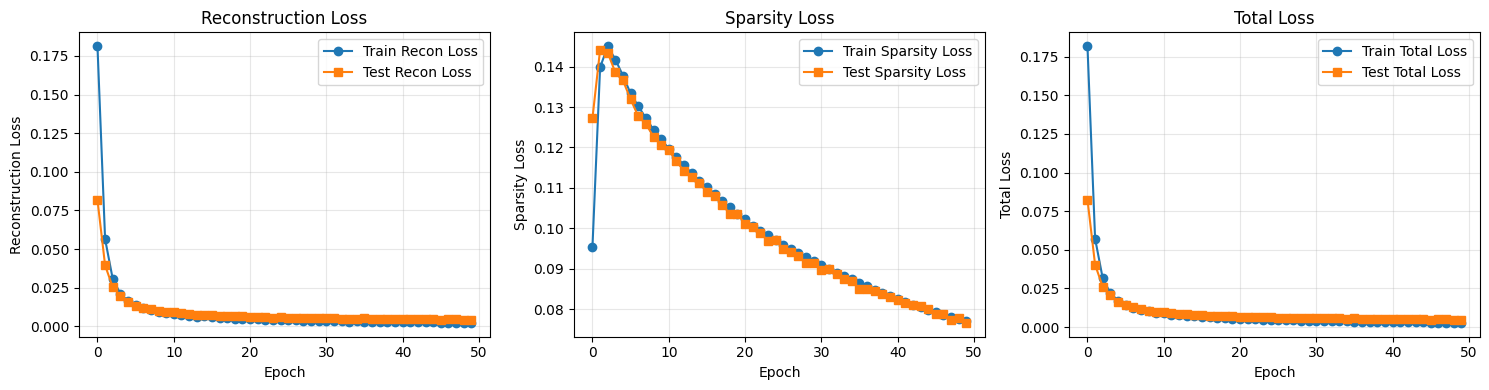

[I 2025-11-05 15:26:28,933] Trial 18 finished with value: 0.004713489463028964 and parameters: {'hidden_dim': 512, 'expanded_ratio': 9.5, 'n_encoder_layers': 3, 'n_decoder_layers': 1, 'lr': 0.00016366925829173383, 'sparsity_weight': 0.005591555587645788}. Best is trial 13 with value: 0.002743865828961134.


test for the following hyperparam: hidden_dim-2048, expanded_ratio-3.5,n_encoder_layers-2,n_decoder_layers-2,sparsity_weight-0.03792709902592381, lr-0.0003014950907124353 


Training: 100%|██████████| 50/50 [00:21<00:00,  2.35it/s, Train Loss=0.0047, Test Loss=0.0109, Train Recon=0.0041, Test Recon=0.0104]


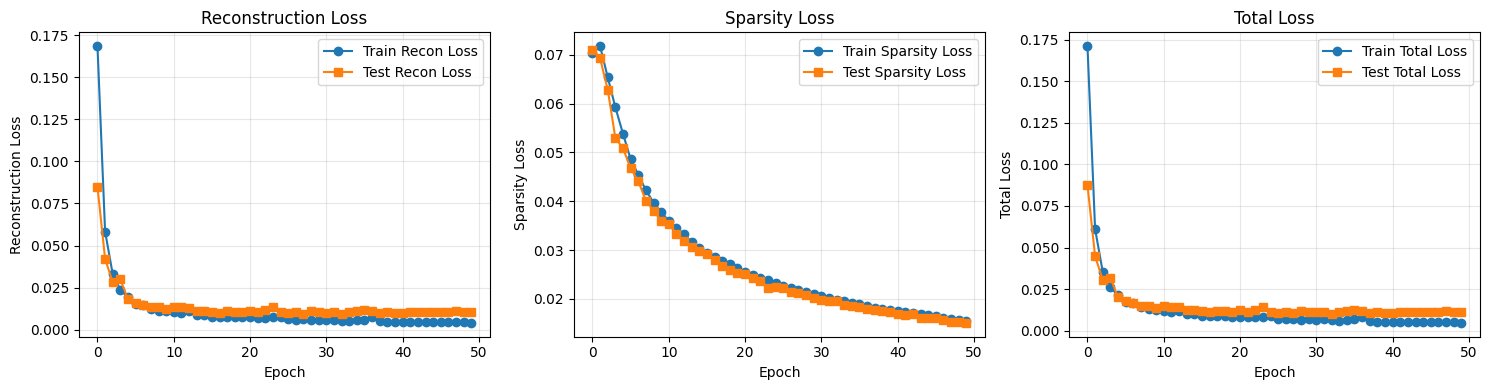

[I 2025-11-05 15:26:50,890] Trial 19 finished with value: 0.010943899163976312 and parameters: {'hidden_dim': 2048, 'expanded_ratio': 3.5, 'n_encoder_layers': 2, 'n_decoder_layers': 2, 'lr': 0.0003014950907124353, 'sparsity_weight': 0.03792709902592381}. Best is trial 13 with value: 0.002743865828961134.


Best trial:
  Value (final test total loss): 0.00274
  Params: 
    hidden_dim: 512
    expanded_ratio: 10.0
    n_encoder_layers: 2
    n_decoder_layers: 1
    lr: 0.00017701853566940679
    sparsity_weight: 0.0006659703893931954


In [16]:
import optuna
import numpy as np 
import torch
import random
import gc

np.random.seed(42)
torch.manual_seed(42)
random.seed(42)

def objective(trial):
    # Suggest hyperparameters to optimize
    hidden_dim = trial.suggest_categorical('hidden_dim', [128, 256, 512, 1028, 2048])
    expanded_ratio = trial.suggest_float('expanded_ratio', 1.5, 10.0, step=0.5)
    n_encoder_layers = trial.suggest_int('n_encoder_layers', 1, 3)
    n_decoder_layers = trial.suggest_int('n_decoder_layers', 1, 3)
    lr = trial.suggest_loguniform('lr', 1e-4, 5e-3)
    sparsity_weight = trial.suggest_loguniform('sparsity_weight', 1e-4, 1e-1)

    # Instantiate model with trial's suggestions
    model = SparseAutoencoder(
        input_dim=512,
        hidden_dim=hidden_dim,
        expanded_ratio=expanded_ratio,
        n_encoder_layers=n_encoder_layers,
        n_decoder_layers=n_decoder_layers,
    )
    # Train model for a small number of epochs for speed
    print(f"test for the following hyperparam: hidden_dim-{hidden_dim}, expanded_ratio-{expanded_ratio},n_encoder_layers-{n_encoder_layers},n_decoder_layers-{n_decoder_layers},sparsity_weight-{sparsity_weight}, lr-{lr} ")
    results = model.train_model(
        train_loader=train_loader,
        test_loader=test_loader,
        n_epochs=50,
        lr=lr,
        sparsity_weight=sparsity_weight,
        plot_losses=True,
    )
    # Return final test total loss as optimization target
    gc.collect()
    torch.cuda.empty_cache()
    return results["test_total_loss"][-1]

study = optuna.create_study(
    direction="minimize",
    sampler=optuna.samplers.TPESampler(seed=42)
)
study.optimize(objective, n_trials=20)

print("Best trial:")
trial = study.best_trial
print(f"  Value (final test total loss): {trial.value:.5f}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


Training: 100%|██████████| 100/100 [00:19<00:00,  5.14it/s, Train Loss=0.0010, Test Loss=0.0023, Train Recon=0.0010, Test Recon=0.0022]


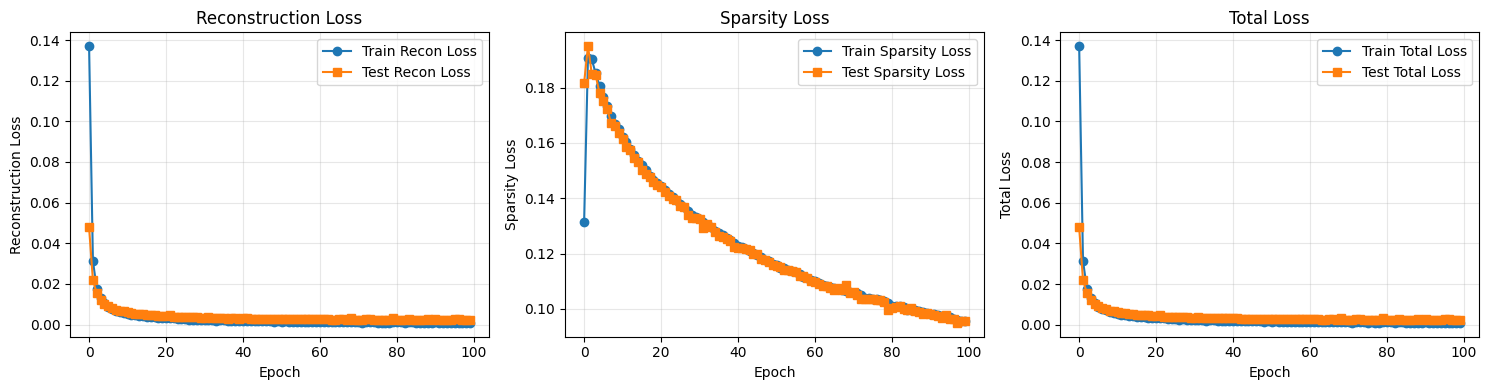

{'train_recon_loss': [0.13697047570347787,
  0.031285514891147614,
  0.017674074590206146,
  0.012876656092703342,
  0.010439512737095357,
  0.008801297627389432,
  0.007728967104107141,
  0.0069197814837098125,
  0.006213999271392822,
  0.00572340752184391,
  0.005331279095262289,
  0.004900236766785383,
  0.00459418135881424,
  0.004433296212926507,
  0.004223617823794484,
  0.003923875313252211,
  0.003670128259807825,
  0.0036350809782743454,
  0.003457647332921624,
  0.0032334165256470444,
  0.0031132151298224925,
  0.0030284455791115762,
  0.0030357736125588416,
  0.0027889835983514787,
  0.002660259749740362,
  0.0026671463884413243,
  0.002432949410751462,
  0.0024949827026575803,
  0.0024285168908536434,
  0.002461394565179944,
  0.0022043405817821623,
  0.002202308672480285,
  0.0021234931237995624,
  0.0019925130968913435,
  0.002132346070371568,
  0.002103556458838284,
  0.0019167002979665994,
  0.0018649156847968698,
  0.0018435437409207226,
  0.0018869613781571388,
  0.00

In [25]:
params = study.best_trial.params
model = SparseAutoencoder(input_dim=512, hidden_dim=params["hidden_dim"], expanded_ratio=params["expanded_ratio"], n_encoder_layers=params["n_encoder_layers"], n_decoder_layers=params["n_decoder_layers"])
model.train_model(train_loader, test_loader, n_epochs=100, lr=params["lr"], sparsity_weight=params["sparsity_weight"], plot_losses=True)



In [27]:
# Save model checkpoint after training best model
checkpoint_path = "./models/best_sparse_autoencoder.pt"
torch.save(model.state_dict(), checkpoint_path)
print(f"Model checkpoint saved to: {checkpoint_path}")
# Save params for reproducibility
import json

params_path = "./models/best_sparse_autoencoder_params.json"
with open(params_path, "w") as f:
    json.dump(params, f, indent=2)
print(f"Model hyperparameters saved to: {params_path}")



Model checkpoint saved to: ./models/best_sparse_autoencoder.pt
Model hyperparameters saved to: ./models/best_sparse_autoencoder_params.json


In [28]:
hyperparms = json.load(open("./models/best_sparse_autoencoder_params.json"))
loaded_model = SparseAutoencoder(
    input_dim=512,
    hidden_dim=params["hidden_dim"],
    expanded_ratio=params["expanded_ratio"],
    n_encoder_layers=params["n_encoder_layers"],
    n_decoder_layers=params["n_decoder_layers"]
)
loaded_model.load_state_dict(torch.load(checkpoint_path))
loaded_model.eval()
print(f"Loaded model from: {checkpoint_path}")


Loaded model from: ./models/best_sparse_autoencoder.pt


/tmp/ipykernel_34547/4238482258.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(checkpoint_path))
